In [2]:
from top2vec import Top2Vec
import MeCab
import json
import neologdn
import re
import random
import transformers
import pandas as pd 
transformers.BertTokenizer = transformers.BertJapaneseTokenizer

# df = pd.read_excel('../../public/data/database2020.xlsx')
with open('../../public/data/tdb/BertTopvecCCCCR202101v2.json', 'r')as f:
    df = pd.read_json(f)

In [3]:
def tokenize(text):
    tagger = MeCab.Tagger("mecab -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd")
    lines = tagger.parse(''.join(text.split())).splitlines()
    words = []
    for line in lines:
        chunk = line.split('\t')
        tmp = chunk[-1].split(',')
        if tmp[0] != 'EOS':
            if tmp[6] != '*':
                words.append(tmp[6])
            else:
                words.append(chunk[0])
    return words

In [4]:
df

,no,parent,distance,Title,Abstract,AuthorKeywords,Conference,TopicScore,child,WordScore
0,0,10549,0.000000,北海道消防機材(株),消火・火災警報設備工事業、消防用機材・器具卸売業。 スプリンクラー設備、水噴霧消火設備、屋...,[],建設業,"[{'word': '設備工事', 'score': 10.546236991882324}...",[0],"[{'word': '設備工事', 'score': 1.538326769155696},..."
1,1,12609,0.000000,北海樹脂興業(株),北海道道央圏を営業エリアとして、ペレットやパイプなど廃プラスチックの再生加工を行っている。...,[],製造業,"[{'word': '産業廃棄物', 'score': 9.238748550415039}...",[1],"[{'word': '産業廃棄物', 'score': 1.306556349935172}..."
2,2,12619,0.000000,(株)トヨタレンタリース新札幌,自動車レンタル、リースを主業に、中古車卸売等を行っている。 自動車レンタルは、ハイブリッド...,[],サービス業,"[{'word': '自動車整備業', 'score': 8.588733673095703...",[2],"[{'word': '自動車整備業', 'score': 1.226961953299386..."
3,3,10653,0.000000,トルク精密工業(株),自動車部品を主体に金属プレス加工、プラスチック射出成形加工、金型製作を行っている。 電磁開...,[],製造業,"[{'word': '機械加工', 'score': 10.666913032531738}...",[3],"[{'word': '機械加工', 'score': 1.50852930792607}, ..."
4,4,10449,0.000000,東洋ワーク(株),製造派遣をはじめとする労働者派遣業を主体に、構内業務請負および有料職業紹介事業などを手掛け...,[],サービス業,"[{'word': '労働者派遣事業', 'score': 11.5260772705078...",[4],"[{'word': '労働者派遣事業', 'score': 1.66364595370702..."
...,...,...,...,...,...,...,...,...,...,...
20462,20462,20465,8.082336,,,[],その他,[],"[4702, 4968, 5585, 6746, 5480, 6502, 6905, 466...","[{'word': 'ガス', 'score': 168.66624955776655}, ..."
20463,20463,20464,8.400618,,,[],その他,[],"[1028, 1032, 1483, 3613, 4721, 540, 4349, 276,...","[{'word': '販売先', 'score': 272.1508562622278}, ..."
20464,20464,20466,8.763490,,,[],その他,[],"[5533, 8130, 9868, 4806, 9, 7621, 7980, 8284, ...","[{'word': 'ビルメンテナンス', 'score': 412.86750935761..."
20465,20465,20466,12.066151,,,[],その他,[],"[3840, 1198, 3788, 3754, 3608, 3663, 7592, 287...","[{'word': '運送業', 'score': 1917.986696386989}, ..."


In [3]:
corpus = []
plot_names = []
categories = []
for name, text, category in zip(df['事業名'], df['事業概要（5行程度以内。別添可）'], df['府省庁']):
    try:
        if text:
            corpus.append((re.sub(r'[0-9]+', "0", neologdn.normalize(text.lower()))))
            # corpus.append(text)
            plot_names.append(name)
            categories.append(category)
            # corpus.append(neologdn.normalize(data[k][2]).lower())
    except:
        print(name, text)

港湾・空港関連施設整備費 nan


In [6]:
corpus = []
plot_names = []
categories = []
for name, text, category in zip(df['Title'], df['Abstract'], df['Conference']):
    try:
        if text:
            corpus.append((re.sub(r'[0-9]+', "0", neologdn.normalize(text.lower()))))
            # corpus.append(text)
            plot_names.append(name)
            categories.append(category)
            # corpus.append(neologdn.normalize(data[k][2]).lower())
    except:
        print(name, text)

In [11]:
embedding_model="sonoisa/sentence-bert-base-ja-mean-tokens-v2"
model = Top2Vec(corpus, seed=2, tokenizer=tokenize, embedding_model=embedding_model)

2023-02-08 10:09:22,806 - top2vec - INFO - Pre-processing documents for training
2023-02-08 10:10:18,591 - top2vec - INFO - Downloading sonoisa/sentence-bert-base-ja-mean-tokens-v2 model
2023-02-08 10:10:30,629 - top2vec - INFO - Creating joint document/word embedding
2023-02-08 10:36:14,690 - top2vec - INFO - Creating lower dimension embedding of documents
2023-02-08 10:36:19,576 - top2vec - INFO - Finding dense areas of documents
2023-02-08 10:36:19,946 - top2vec - INFO - Finding topics


In [12]:
topic_sizes, topic_nums = model.get_topic_sizes()

for i, size in enumerate(topic_sizes):
    print(i, size)

0 723
1 559
2 492
3 326
4 318
5 282
6 271
7 242
8 240
9 233
10 228
11 223
12 215
13 214
14 214
15 207
16 199
17 189
18 177
19 166
20 157
21 141
22 138
23 135
24 133
25 129
26 128
27 119
28 116
29 116
30 106
31 105
32 105
33 99
34 95
35 87
36 86
37 84
38 83
39 82
40 81
41 79
42 77
43 75
44 74
45 71
46 70
47 69
48 69
49 69
50 68
51 67
52 67
53 66
54 65
55 64
56 61
57 61
58 61
59 58
60 57
61 56
62 56
63 52
64 49
65 46
66 42
67 41
68 39
69 38
70 36
71 36
72 35
73 33
74 33
75 32
76 31
77 31
78 31
79 28
80 27
81 27
82 25
83 19


In [14]:
model.save('../../public/data/tdb/models/T2V230208.model')

In [20]:
model = Top2Vec.load('../../public/data/models/BertTopvecRS21_230118.model')

In [21]:
phrase = {}
for topic in model.topic_words:
    for word in topic:
        if word not in phrase:
            phrase[word] = 0
        phrase[word] += 1
phrase_sorted = sorted(phrase.items(), key = lambda x:x[1])

tagger = MeCab.Tagger("mecab -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd")
NoUseWords = ['事業', '業務', '費', '化', '企業', '業者', '製品', '会社']
exclusion_words = []
for word in phrase_sorted:
    line = tagger.parse(word[0]).split()
    chk = line[1].split(',')
    try:
        # 固有名詞以外外す
        # if line[0][-2:] in exclusion_words or chk[1] != '固有名詞':
        #     NoUseWords.append(line[0])
        # 名詞は全部入れる
        if line[0][-2:] in exclusion_words or chk[0] != '名詞':
            NoUseWords.append(line[0])
        # サ変接続だけ外す
        if line[0][-2:] in exclusion_words or chk[1] == 'サ変接続':
            NoUseWords.append(line[0])
    except:
        NoUseWords.append(line[0])        

import numpy as np
topic = []
for words, scores in zip(model.topic_words, model.topic_word_scores):
    tmp = {}
    for word, score in zip(words, scores):
        tmp[word] = score
    topic.append(tmp)

for words in topic:
    for word in list(words.keys()):
        if word in NoUseWords:
            words.pop(word)

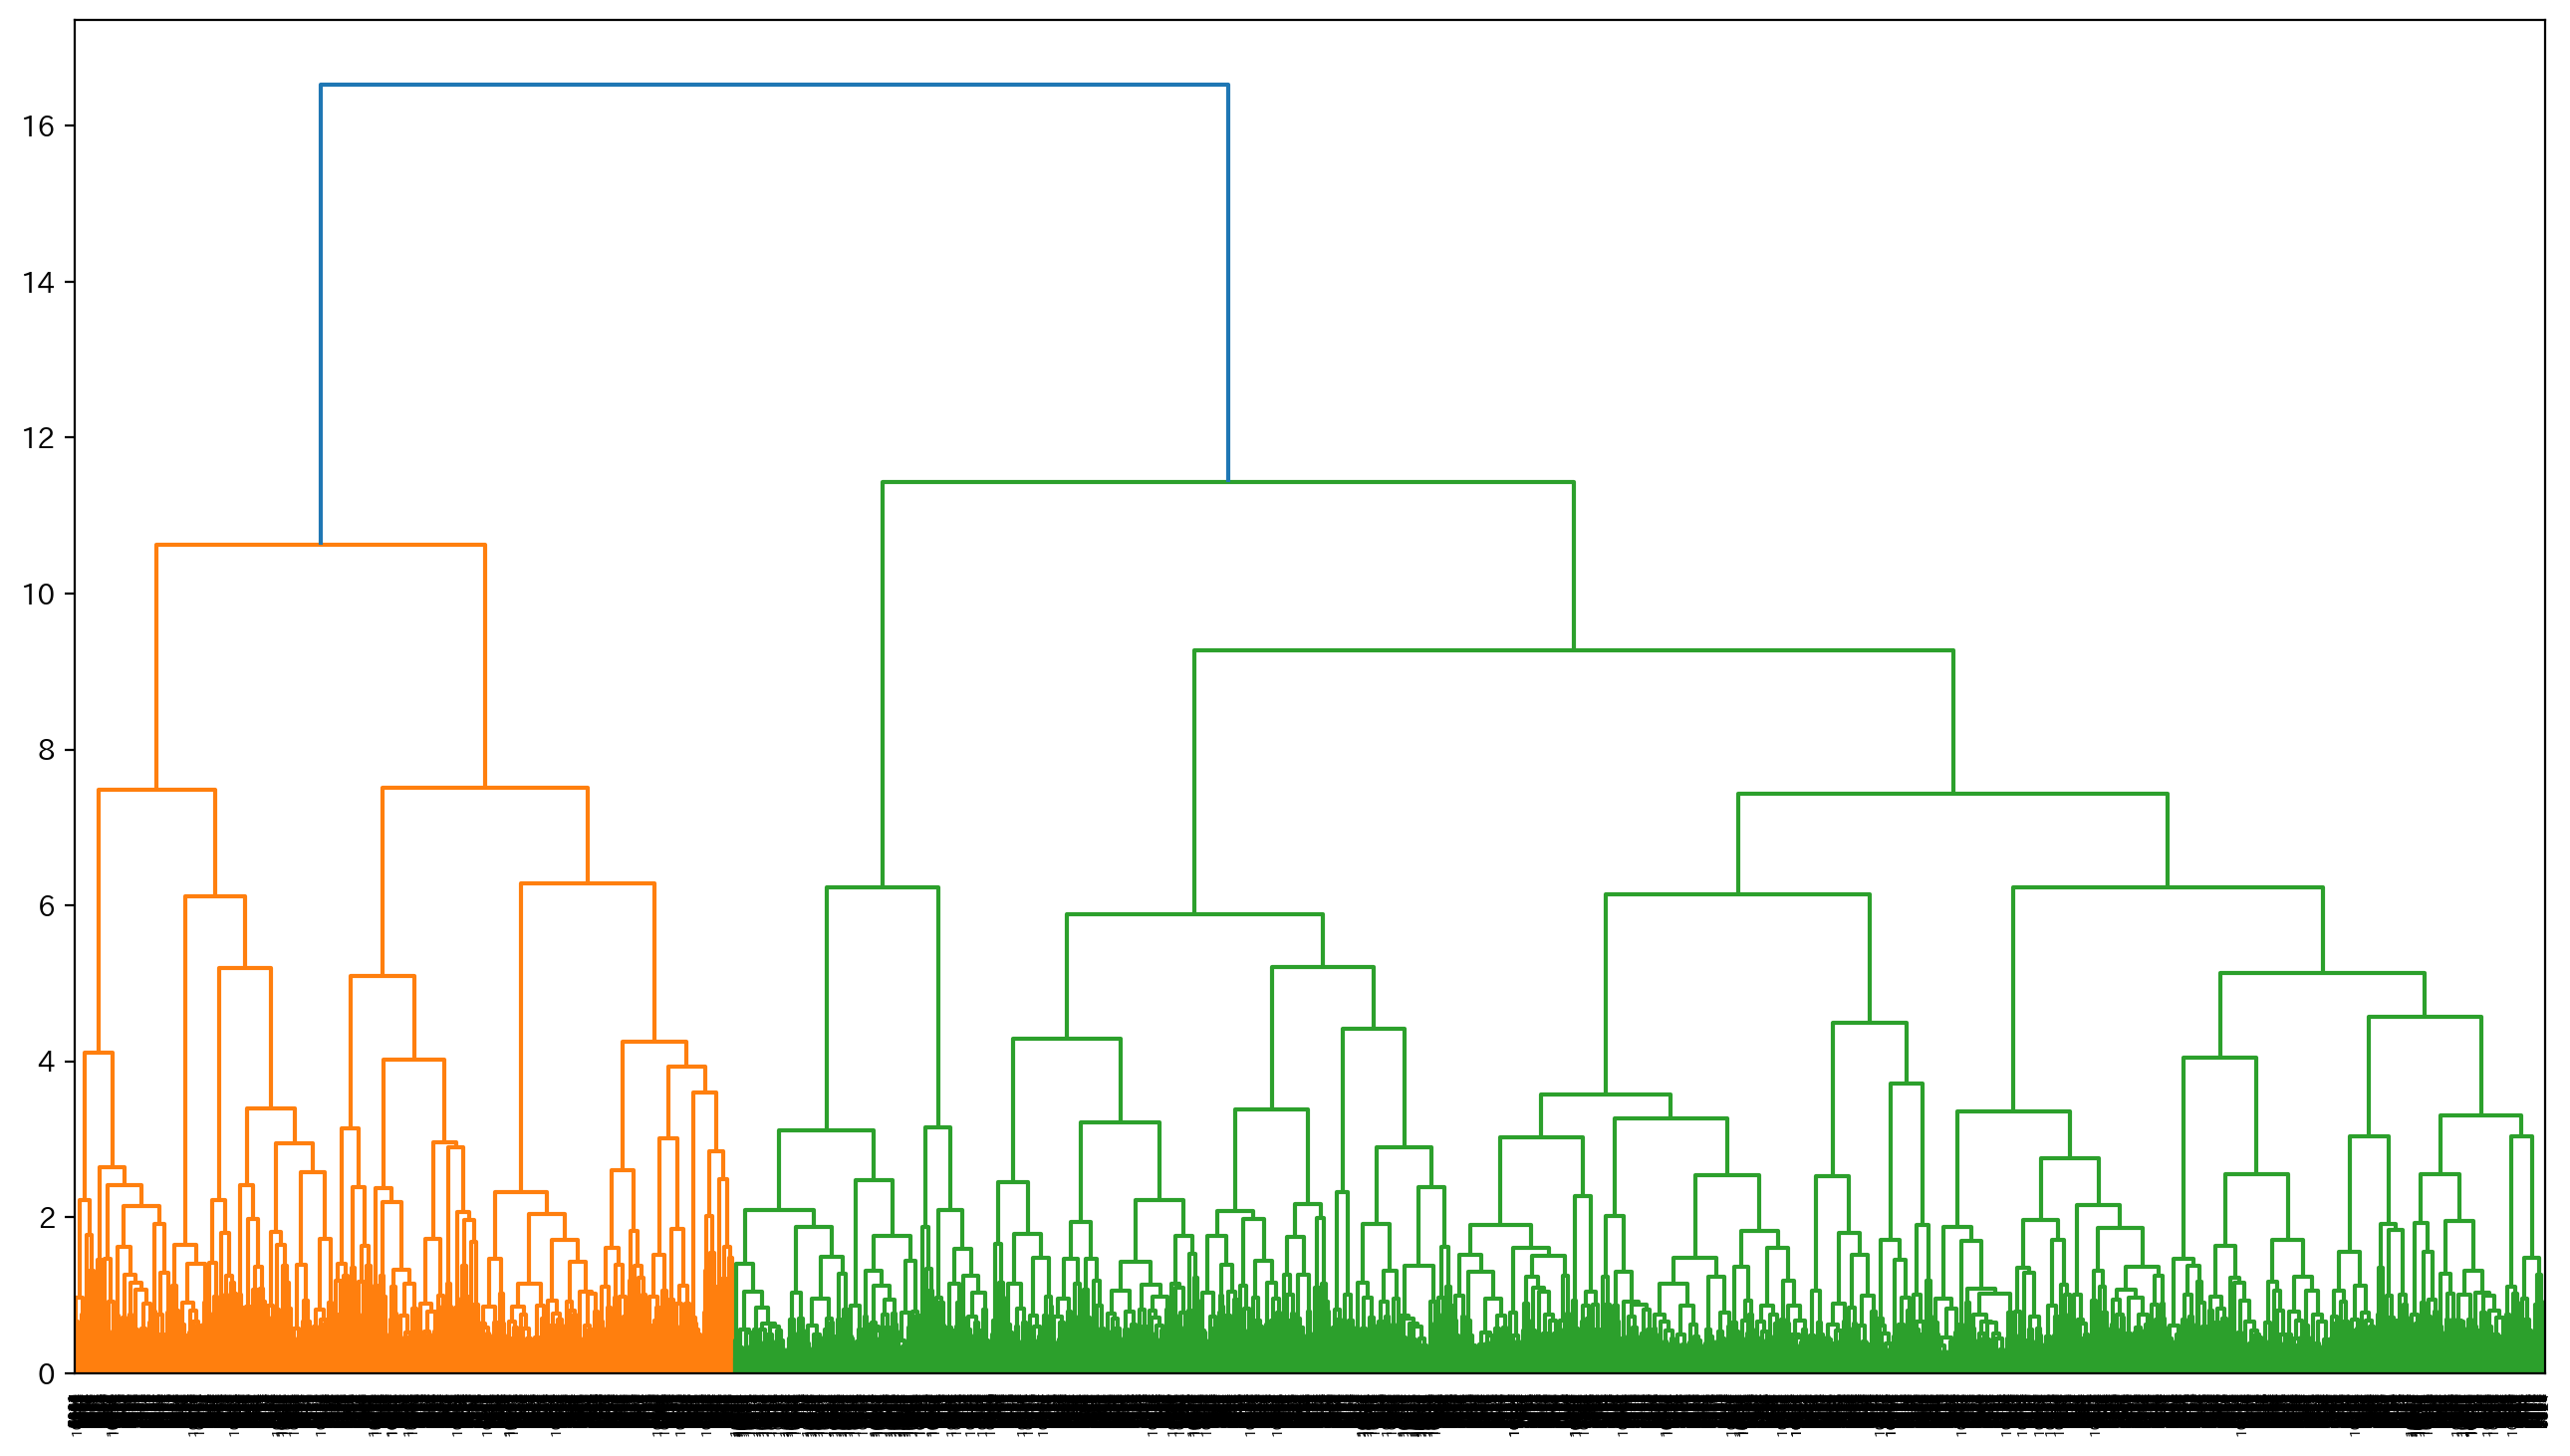

In [16]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
plot_list = model.document_vectors
 
dist = pdist(plot_list, metric='cosine')
linkage_result = linkage(dist, method='ward')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result)
plt.savefig('../../public/data/ss/RS21_221126.png')
plt.show()

In [22]:
obj = []
for i, (title, abstract, conference) in enumerate(zip(plot_names, model.documents, categories)):
  word_score = {}
  topic_nums, topic_score, topic_words, word_scores = model.get_documents_topics(doc_ids=[i], num_topics=100)
  for weight, words, scores in zip(topic_score[0], topic_words[0], word_scores[0]):
      # if weight < 0:
      #     continue
      for word, score in zip(words, scores):
        if word not in NoUseWords and all(NUW not in word for NUW in NoUseWords):
          if word not in word_score:
              word_score[word] = 0
          word_score[word] += weight * score

  tmp = sorted([(word, word_score[word]) for word in set(tokenize(model.documents[i])) if word in word_score and word_score[word] > 0], key=lambda item: item[1], reverse=True)

  topvec = []
  for k, v in tmp:
      topvec.append({'word':k,
                      'score':v})

  obj.append({"id":str(i),
              "parent":"",
              "distance":0,
              "name":title,
              "text":abstract,
              "category":conference,
              "TopicScore":topvec
              })

for i in range(len(linkage_result)):
  obj.append({"id":str(len(corpus)+i),
              "parent":"",
              "distance":linkage_result[i][2],
              "name":"",
              "text":"",
              "category":"",
              "TopicScore":[]
              })

print(len(obj))
for i in range(len(obj)):
  if i % 1000 == 0 :
    print("running", i)
  for j in range(len(linkage_result)):
    if int(obj[i]["id"]) == linkage_result[j][0] or int(obj[i]["id"]) == linkage_result[j][1]:
      obj[i]["parent"] = str(len(linkage_result)+j+1)

20467
running 0
running 1000
running 2000
running 3000
running 4000
running 5000
running 6000
running 7000
running 8000
running 9000
running 10000
running 11000
running 12000
running 13000
running 14000
running 15000
running 16000
running 17000
running 18000
running 19000
running 20000


In [24]:
obj[0]

{'id': '0',
 'parent': '6304',
 'distance': 0,
 'name': '情報通信技術調達等適正・効率化推進費',
 'text': '政府全体で共通的に利用するシステム、基盤、機能等の整備及び運用に係る予算を内閣官房において一括して要求・計上する。\n内閣官房は、要求から執行までの各段階において、各情報システム等の要求内容や執行時の詳細を確認し、統一的、横断的な助言、支援を行うことにより、重複投資の抑制、最終的な支出額の適正化、費用対効果の最大化、柔軟な予算配分等を実現する。',
 'category': '内閣官房',
 'TopicScore': [{'word': '情報システム', 'score': 27.068278312683105},
  {'word': 'システム', 'score': 24.120915174484253},
  {'word': '基盤', 'score': 19.389224529266357},
  {'word': '予算', 'score': 18.492680072784424},
  {'word': '内閣官房', 'score': 6.926339149475098},
  {'word': '詳細', 'score': 1.497359275817871}]}

In [23]:
import copy
test = copy.deepcopy(obj)
for t in test:
    t['child'] = [t['id']]
for t in test:
    try:   
        test[int(t['parent'])]['child'].append(t['id'])
    except:
        print(t)
for t in test:
    tmp = []
    for i in range(1, len(t['child'])):
        tmp += test[int(t['child'][i])]['child']
    if tmp != []:
        t['child'] = tmp

{'id': '20466', 'parent': '', 'distance': 16.53350871573166, 'name': '', 'text': '', 'category': '', 'TopicScore': [], 'child': ['20466', '20464', '20465']}


In [24]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
emptyid = []

for i, t in enumerate(test):
    if i % 1000 == 0:
        print(f'did {i}')
    corpus = []
    for c in t['child']:
        s = ''
        for w in test[int(c)]['TopicScore']:
            s += w['word'] + ' '
        corpus.append(s)

    try:
        vectorizer = TfidfVectorizer(tokenizer=tokenize, use_idf=True, smooth_idf=True, sublinear_tf=True)
        X = vectorizer.fit_transform(corpus)
        values = X.toarray()
        feature_names = vectorizer.get_feature_names_out()
        tmp_TfIdf = pd.DataFrame(values, columns = feature_names)

        word_dic = {}
        error_words = []
        for i, c in enumerate(t['child']):
            for w in test[int(c)]['TopicScore']:
                try:
                    if w['word'] not in word_dic:
                        word_dic[w['word']] = 0
                    word_dic[w['word']] += w['score'] * tmp_TfIdf[w['word']][i]
                except:
                    if w['word'] not in error_words:
                        error_words.append(w['word'])
            
        tmp = []
        for k, v in word_dic.items():
            tmp.append({'word':k, 'score':v})
        t['keywords'] = tmp
    except:
        emptyid.append(i)
        t['keywords'] = []
for t in test:
    del t['TopicScore']

did 0
did 1000
did 2000
did 3000
did 4000
did 5000
did 6000
did 7000
did 8000
did 9000
did 10000
did 11000
did 12000
did 13000
did 14000
did 15000
did 16000
did 17000
did 18000
did 19000
did 20000


In [27]:
for i in [e for e in emptyid if e < len(model.documents)]:
    print(test[i])

{'id': '232', 'parent': '7368', 'distance': 0, 'name': '新たな国立公文書館施設の整備に必要な経費', 'text': '平成0年度に策定した基本計画を踏まえ、平成0年度から基本設計に着手し、今年度は引き続き実施設計を進める。', 'category': '内閣府', 'child': ['232'], 'keywords': []}
{'id': '421', 'parent': '6928', 'distance': 0, 'name': '消費者団体訴訟制度の周知・広報', 'text': '消費者団体訴訟制度の適切かつ実効的な周知・広報活動を行う。', 'category': '消費者庁', 'child': ['421'], 'keywords': []}
{'id': '614', 'parent': '7140', 'distance': 0, 'name': '災害廃棄物処理代行事業', 'text': '国が代行する範囲については、各自治体と調整しながら、代行申請に基づいて範囲を決定する。可燃物の処理について、代行申請が成された場合、既に各自治体が収集・分別した災害廃棄物を、国が設置する仮設処理施設にて処理を行い、最終処分までを国が代行することとなる。', 'category': '復興庁', 'child': ['614'], 'keywords': []}
{'id': '691', 'parent': '8838', 'distance': 0, 'name': '投票環境の向上等に要する経費', 'text': '・タブレット端末などの汎用機を用いた電子投票機による電子投票の改善等について調査研究の実施。\n・研修履修者数の少ない地方都市等の手話通訳士を主な対象として全国各地の主要都市において「政見放送手話通訳士研修会」を開催。', 'category': '総務省', 'child': ['691'], 'keywords': []}
{'id': '853', 'parent': '8563', 'distance': 0, 'name': '再犯の防止等の推進（ソーシャル・インパクト・ボンドの活用）', 'text': 'sibを活用し,非行少年を対象として,少年院在院中から出院後

In [28]:
topic_nums, topic_score, topic_words, word_scores = model.get_documents_topics(doc_ids = [853], num_topics = 100)
print(f'{topic_nums}')
print(f'{topic_score}')
print(f'{topic_words}')
print(f'{word_scores}')

[[ 7 29 37  0 28 40  1 38 43 23 33 21 22 16  6  9 36 15 30 45 26 13 11 10
  41 25  8 35  3 12 31 14  2 32 39 17 19 44 20  5 34 24 18  4 27 42]]
[[8.721882   8.645235   7.7348027  7.678261   7.232456   6.4920607
  6.301765   6.136014   5.7516403  5.6731753  5.487984   5.455691
  5.443885   5.427559   5.3729935  5.3224916  5.244441   5.1369643
  5.0151095  4.9245806  4.8803167  4.6093993  4.4128566  4.293648
  4.1157207  3.9729767  3.6836836  3.6380804  3.573255   3.5171757
  3.498384   3.424909   3.3639925  3.343041   3.309314   3.257587
  3.0762973  3.0639877  3.0034518  2.9833488  2.8725753  2.868703
  2.8068736  1.8065052  1.686891   0.96620727]]
[[['職業紹介事業' '独立行政法人高齢・障害・求職者雇用支援機構' '人材育成支援' ... '義務教育' '派遣' '講習']
  ['地域福祉' '子育て支援' '生活支援' ... '貸し付ける' '地方自治体' '遠隔教育']
  ['独立行政法人高齢・障害・求職者雇用支援機構' '雇用機会' '有期雇用労働者' ... '法定受託事務' '更生' '修得']
  ...
  ['災害復旧' '環境影響評価' '環境技術' ... '建築基準法' 'とりまとめ' '再編']
  ['環境基準' '環境影響評価' '環境規制' ... '監査' 'ケーススタディ' 'ゾーニング']
  ['石油天然ガス・金属鉱物資源機構' '石油精製' '石油備蓄基地' ... '第

In [20]:
with open('../../public/data/tdb/T2V_CC_230208.json', 'w', encoding='utf8')as f:
    json.dump(test, f, indent=2, ensure_ascii=False)

In [118]:
words = {}
for i, topic in enumerate(model.get_topics()[0]):
    for word in topic:
        if word not in words:
            words[word] = []
        words[word].append(i)

In [119]:
num_appearance = {}
for n in list(words.values()):
    if len(n) not in num_appearance:
        num_appearance[len(n)] = 0
    num_appearance[len(n)]+=1

In [53]:
sorted_data = {}
for k in sorted(num_appearance.keys()):
    sorted_data[k] = num_appearance[k]

In [54]:
len(words)

1221

In [55]:
words

{'医療支援': [0, 17, 22],
 '先進医療': [0, 17, 22],
 '医療安全支援センター': [0, 17, 22],
 '医療機器': [0, 17],
 '医療用': [0, 17, 22],
 '医療従事者': [0, 22],
 '医療機関': [0, 22],
 '医療施設': [0],
 '地域医療': [0, 22],
 '保険医療機関': [0, 22],
 '医療': [0],
 '臨床研修': [0, 41],
 '医療計画': [0, 22],
 '地域医療支援病院': [0, 22],
 '国立保健医療科学院': [0, 17, 22],
 '医療保険': [0, 22],
 '専門機関': [0, 5],
 '医療法人': [0],
 '救急医療': [0, 17],
 '在宅医療': [0, 22, 28],
 '診療所': [0],
 '日本医療研究開発機構': [0],
 '後期高齢者医療広域連合': [0, 22, 28],
 '支援ツール': [0, 4, 5, 6, 15, 22, 31, 42, 43],
 '福祉医療機構': [0, 22, 25, 28],
 '医薬品医療機器総合機構': [0, 17],
 '保健指導': [0],
 '診療': [0],
 '特定機能病院': [0],
 'オンライン診療': [0],
 '医療費': [0, 22],
 '救命救急センター': [0],
 '専門医': [0],
 '指定入院医療機関': [0, 22],
 '特定健康診査': [0, 17],
 '医療事故': [0],
 '専門職': [0, 1, 41],
 '診療報酬': [0, 22],
 '研修プログラム': [0, 1, 34, 41, 42, 47],
 '人材育成支援': [0, 1, 9, 23, 34, 37, 41, 42, 43, 47],
 '特定健診': [0, 17],
 'かかりつけ医': [0],
 '養成': [0, 1, 41],
 '研究施設': [0, 17, 18, 32],
 'サポート': [0],
 '治験': [0, 17],
 'ヘルスケア': [0],
 '健康診査': [0],
 '治療法': [0, 17],
 '実証研究': [0, 

In [89]:
sorted_data

{1: 976,
 2: 491,
 3: 288,
 4: 159,
 5: 139,
 6: 107,
 7: 67,
 8: 57,
 9: 46,
 10: 42,
 11: 42,
 12: 18,
 13: 25,
 14: 12,
 15: 18,
 16: 13,
 17: 9,
 18: 9,
 19: 6,
 20: 4,
 21: 4,
 22: 3,
 23: 4,
 24: 2,
 25: 4,
 26: 5,
 27: 2,
 28: 1,
 29: 3,
 30: 1,
 32: 2,
 33: 1,
 34: 1,
 38: 1}

In [56]:
checkid = []
for o in obj:
    checkid.append(o['id'])
checkid2 = set(checkid)

In [57]:
len(checkid) == len(checkid2)

True

In [58]:
checkid2

{'8688',
 '3074',
 '4764',
 '6480',
 '1779',
 '8394',
 '1841',
 '5594',
 '8187',
 '10130',
 '8569',
 '10466',
 '1012',
 '2578',
 '7942',
 '8022',
 '6842',
 '5840',
 '2592',
 '8862',
 '9933',
 '9996',
 '9285',
 '10602',
 '272',
 '4497',
 '415',
 '9036',
 '3202',
 '7924',
 '6640',
 '1253',
 '3033',
 '4802',
 '3143',
 '10108',
 '7384',
 '4474',
 '9348',
 '8920',
 '6616',
 '7408',
 '9794',
 '442',
 '8029',
 '1998',
 '1347',
 '3974',
 '2326',
 '645',
 '184',
 '1103',
 '4972',
 '10557',
 '2447',
 '9037',
 '5746',
 '697',
 '8839',
 '204',
 '2825',
 '648',
 '5622',
 '3356',
 '9609',
 '8328',
 '1093',
 '950',
 '2851',
 '178',
 '4038',
 '1418',
 '10292',
 '5550',
 '3691',
 '5827',
 '6783',
 '3365',
 '871',
 '5327',
 '9563',
 '1002',
 '7299',
 '6972',
 '6350',
 '7115',
 '6655',
 '8842',
 '9278',
 '8904',
 '9870',
 '9291',
 '7775',
 '8404',
 '9415',
 '5067',
 '7163',
 '7285',
 '2186',
 '3160',
 '10408',
 '2290',
 '698',
 '5763',
 '7091',
 '976',
 '1861',
 '2057',
 '2693',
 '3971',
 '5322',
 '5315'